# Байесовская статистика: вывод для монеты

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scienceplots
from IPython.core.pylabtools import figsize
plt.style.use(['science', 'notebook', 'grid', 'ggplot'])

import numpy as np
import scipy.stats as stats

Пусть у нас есть монета которая с вероятность $p$ падает орлом и с вероятностью $1-p$ падает решкой,
проблема в том что вероятность выпадения орла мы не знаем и можем только оценивать среднем или другими характеристиками,
но как условно построить доверительный интервал для верятности если число испытаний маленькое, как например узнать вероятность того, что вероятность орла равна $0,5$, $P(p=0,5)$ и другие характеристики, тут помогает Байесовская статистика

Пусть мы пронаблюдали какие то исходы монеты:

In [2]:
real_p = stats.uniform.rvs()

data = stats.bernoulli.rvs(p = real_p, size = 20)

data

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

При обычном подходе в данной задаче мы можем посчитать найти оценку максимального правдоподобия $P(D|p) \rightarrow max$ где $p$ - это вероятность орла, $D$ наблюдаемые данные,  
$P(D|p)=L(p)=\prod\limits_{x_i\in D} P(x_i|p)=\prod\limits_{x_i\in D} p^{x_i} (1-p)^{1-x_i}$  
где x исход подбрасывания монеты, логорифмируя получаем:<br> $\ln L(p) = \sum \limits_{x \in D} \ln(p^x (1-p)^{1-x}) = \sum \limits_{x \in D} [x \ln(p) + (1-x) \ln(1-p)]$  
Для нахождения максимума функции правдоподобия, мы берем производную по $p$ и приравниваем ее к нулю:  
$\frac{d}{dp} \ln L(p) = \sum \limits_{x \in D} \left(\frac{x}{p} - \frac{1-x}{1-p}\right) = 0$<br> если k сумма орлов,а n количества исходов получаем $p_{max L} = \frac{k}{n}$  
<hr>

В Байесовской статистики мы моделируем само распределение $p$ через теорему Баеса <br>
$P(p|D) = \frac{P(D|p)\cdot P(p)}{P(D)}$<br>
где $P(D|p)$ наше правдоподобие котоыре мы считали выше, $P(p)$ наше априорное мнение о распределении данных, $P(D)$ нормировочная константа которая нужна чтобы сумма всех вероятностей была всегда равна 1, которую можно посчитать как $P(D)= \sum \limits_p P(D|p)\cdot P(p)$, в непрерывном случае: $P(D)= \int \limits_p P(D|p)P(p)\delta p$  
<hr>

Приведу пример: На пример до подбрасывания монеты предпологаем что у нее вероятность либо 0.25, либо 0.5, или 0.75, и для меня эти вероятности равнозначны, те. распределены равномерно

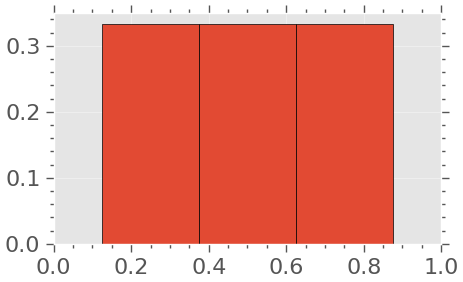

In [3]:
p = np.array([0.25, 0.5, 0.75])
P_p = np.array([1/3]*3)

def plot_bar_dist(p,P_p):
    plt.figure(figsize=(5,3))
    plt.xlim((0,1))
    plt.bar(p, P_p, edgecolor='black', width=0.25)
    plt.show()

plot_bar_dist(p,P_p)

Посмотрим что будет с апостериорным распределением если мы подбросим монету и нам выпадет орел  
Апосториорное для каждой вероятности p считаем по этой формуле  
$P(p|D) = \frac{P(D|p)\cdot P(p)}{P(D)}$  
$P(D|p)$ в данном случае равен просто p так как выпал орел, а $P(D)$ можно считать по формуле выше, а можно просто отнормровать сумму апостериорного распределения до равенства 1, так как $P(D)$ это число, нормировочная контсанта

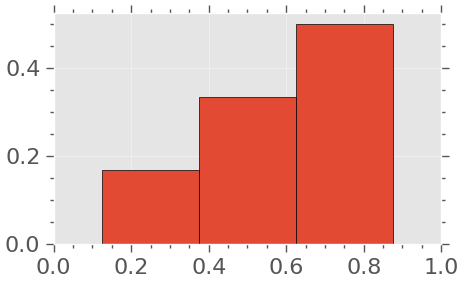

In [4]:
P_p = P_p*p
P_p /= sum(P_p)

plot_bar_dist(p,P_p)

Как и ожидалось наше апостериорное распределение вытянулось к 0.75, если мы еще раз подбросим монету и нам выпадет орел, мы производим теже самые операции, только текущее апостериорное берем за априорне, $P(D|p) = (1-p)$

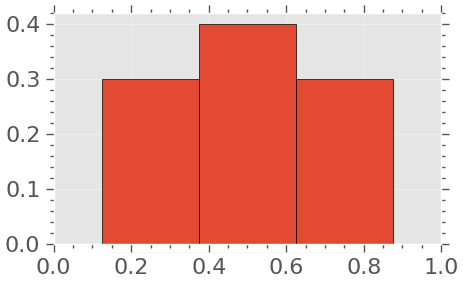

In [5]:
P_p = P_p*(1-p)
P_p /= sum(P_p)

plot_bar_dist(p,P_p)

Теперь мы больше склоняемся к вероятности монеты равной, 0.5, пусть мы еще 7 раз подкинули монету, и нам выпало 5 орлов и 2 решки,  
$P(D|p) = p^5(1-p)^2$

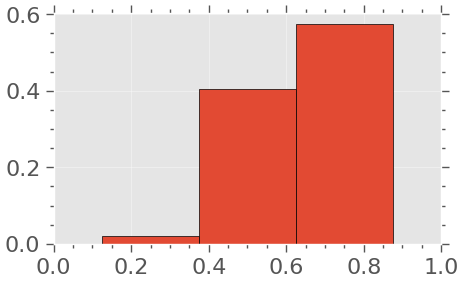

In [6]:
P_p = P_p*(p**5)*(1-p)**2
P_p /= sum(P_p)

plot_bar_dist(p,P_p)

одно из преимуществ данного подхода что для оценивания вероятноси на новом шаге нам не нужно хранить в себе данные, нужно хранить только само распределение, далее можно распределить всю прямую на бесконечно малые столбцы и перейти к непрерывному случаю

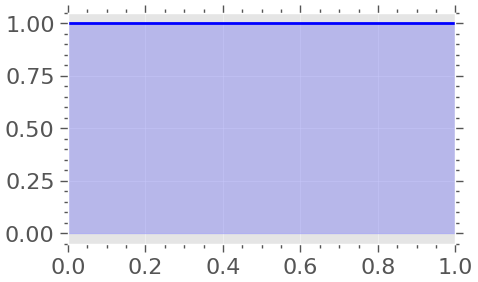

In [7]:
p= np.linspace(0,1,1000)
P_p = stats.uniform.pdf(p)

def plot_continuous_dist(x, y):
    plt.figure(figsize=(5,3))
    plt.xlim((0, 1))
    plt.plot(x, y, color='blue')
    plt.fill_between(x, y, color='blue', alpha=0.2)
    plt.show()

plot_continuous_dist(p,P_p)

Также подбросм одного орла и одну решку:

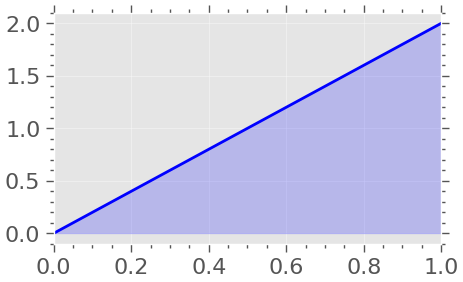

In [8]:
P_p = P_p*p
P_p /= sum(P_p)/p.size

plot_continuous_dist(p,P_p)

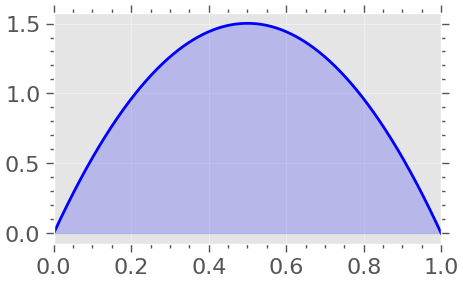

In [9]:
P_p = P_p*(1-p)
P_p /= sum(P_p)/p.size

plot_continuous_dist(p,P_p)

Теперь аналогично еще 5 орлов и 2 решеки:

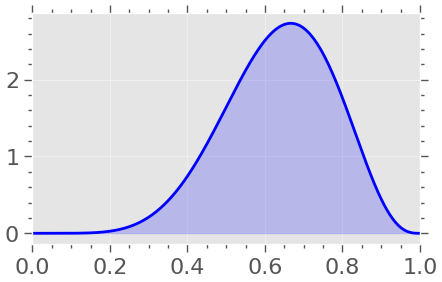

In [10]:
P_p = P_p*(p**5)*(1-p)**2
P_p /= sum(P_p)/p.size

plot_continuous_dist(p,P_p)

В непрерывном случае у нас за счет нехитрых математических манипуляций из формулы пересчета апостериорного распределения получается [Бетта распределение](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) с параметрами  
$B(\alpha = k+1,\ \beta = n-k+1)$

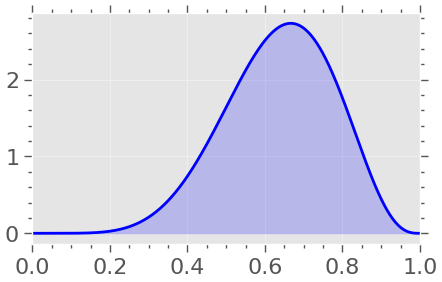

In [11]:
plot_continuous_dist(p, stats.beta.pdf(p, 6+1,3+1))

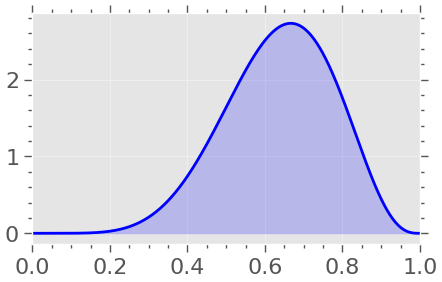

In [11]:
plot_continuous_dist(p, stats.beta.pdf(p, 6+1,3+1))

Также одно из преимуществ данного подхода к оценке параметров является возможнось явно узнать вероятность например что P(p>0.5)

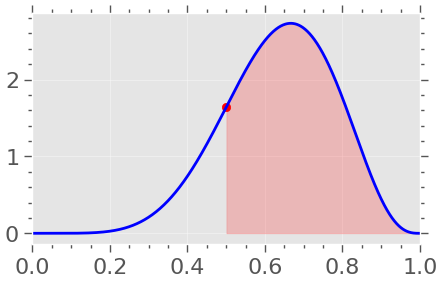

Площадь закрашенной области = 0.828125


In [17]:
x= p
y= stats.beta.pdf(p, 6+1,3+1)

plt.figure(figsize=(5,3))
plt.xlim((0, 1))
plt.plot(p, y, color='blue')
plt.scatter([0.5], [stats.beta.pdf(0.5, 6+1,3+1)], color='red')
plt.fill_between(x, y,where=(x >= 0.5), color='red', alpha=0.2)
plt.show()

print(f"Площадь закрашенной области = {1-stats.beta.cdf(0.5, 6+1,3+1)}")

Тут можно посмотреть как _Бета-распределение_ себя ведет при различных n и k:

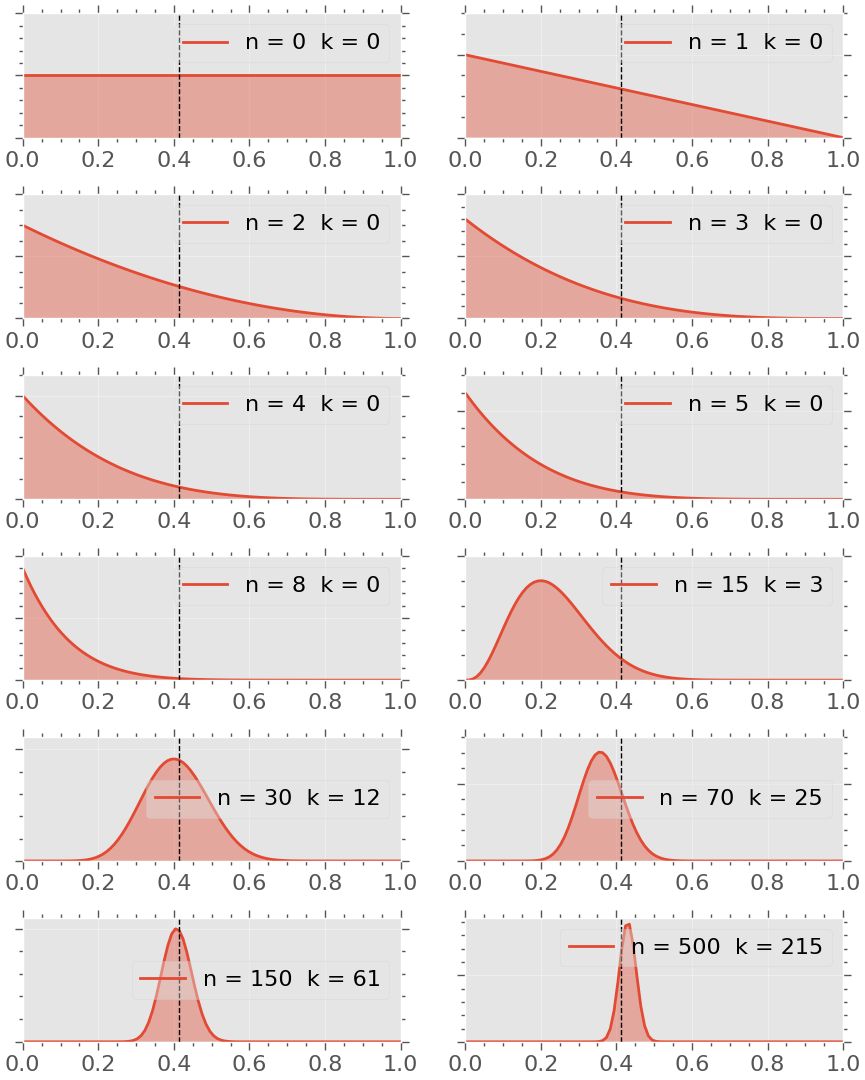

In [12]:
dist = stats.beta
real_p = stats.uniform.rvs()
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 30, 70, 150, 500]
data = stats.bernoulli.rvs(real_p, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(9,11))

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.setp(sx.get_yticklabels(), visible=False)
    k = data[:N].sum()
    y = dist.pdf(x, 1 + k, 1 + N - k)
    plt.plot(x, y, label=f"n = {N}  k = {k}")
    plt.fill_between(x, 0, y, alpha=0.4)
    plt.vlines(real_p, 0, np.max(y)+1, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.tight_layout()

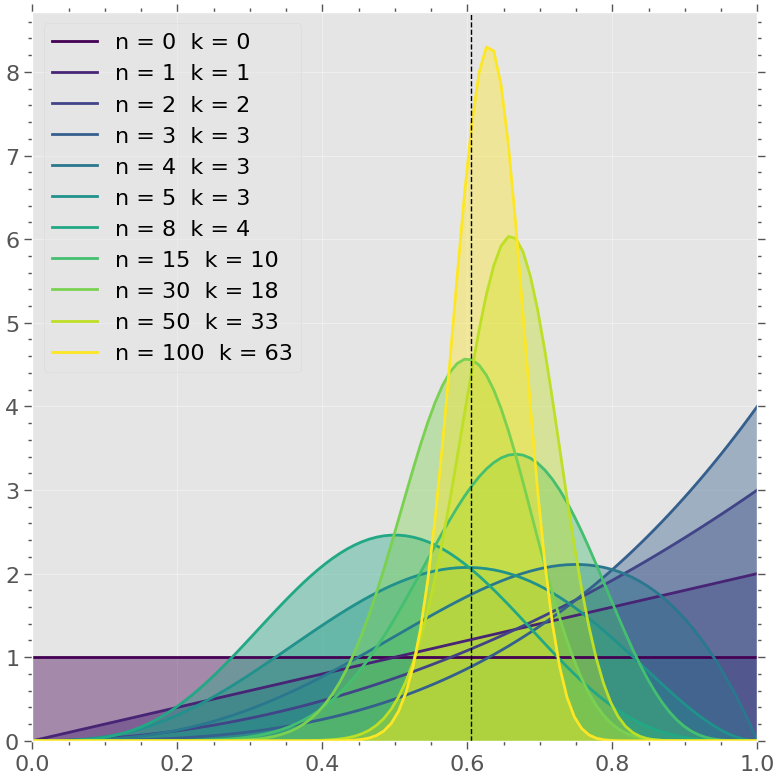

In [30]:
dist = stats.beta
real_p = stats.uniform.rvs()
n_trials = [0, 1, 2, 3, 4, 5, 8,15,30, 50,100]
data = stats.bernoulli.rvs(real_p, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_trials)))  # Генерация цветов для каждого графика

for k, N, color in zip(n_trials, n_trials, colors):
    k = data[:N].sum()
    y = dist.pdf(x, 1 + k, 1 + N - k)
    plt.plot(x, y, label=f"n = {N}  k = {k}", color=color)
    plt.fill_between(x, 0, y, alpha=0.4, color=color)

plt.vlines(real_p, 0, plt.ylim()[1], color="k", linestyles="--", lw=1)
leg = plt.legend()
leg.get_frame().set_alpha(0.4)
plt.autoscale(tight=True)
plt.tight_layout()
plt.show()

Мода (пик) данного распределения будет наодится в точке максимального правдоподобия  
$p_{maxL}=\frac{k}{n}$  
А значение p среднее в точке  
$p_{mean}= \frac{k+1}{n+2}$

Также необходимо понимать что априорное распределение задаем мы сами, до опыта если мы немного уверены что вероятность орла скорее всего равна 0.5 можно задать __ЛЮБОЕ__ априорное распределение вытянутое к 0.5 (в том числе можно даже взять нормальное или лапласа на интервале $[0,1]$)

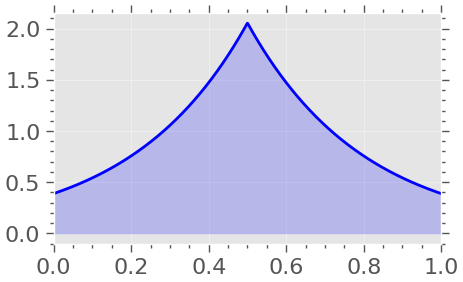

In [13]:
p= np.linspace(0,1,1000)
P_p = stats.laplace.pdf(p, loc=0.5, scale= 0.3)
P_p /= sum(P_p)/p.size

plot_continuous_dist(p, P_p)

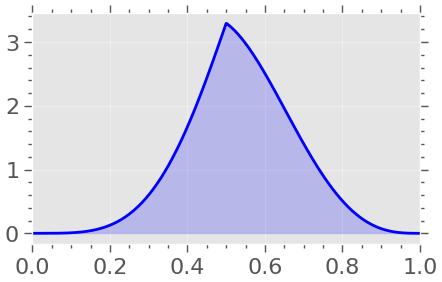

In [14]:
P_p = P_p*(p**4)*(1-p)**3
P_p /= sum(P_p)/p.size

plot_continuous_dist(p,P_p)

Если фокусироваться на теоретической стороне, то оптимальным выбором априорного распределения в данном контексте будет бета-распределение, поскольку после применения байесовского обновления мы получим в результате также __бета-распределение__. Таким образом, бета-распределение является сопряженным априорным распределением к самому себе в байесовском подходе.

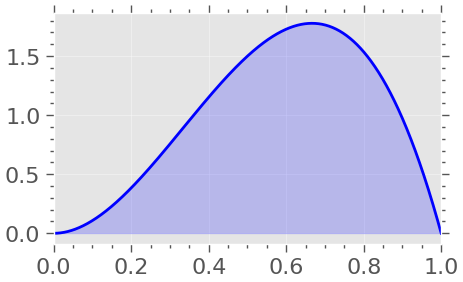

In [15]:
P_p = stats.beta.pdf(p,3,2)

plot_continuous_dist(p,P_p)

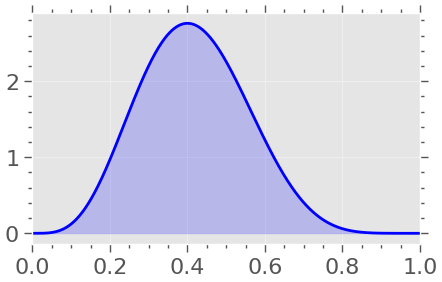

In [16]:
P_p = P_p*(p**2)*(1-p)**5
P_p /= sum(P_p)/p.size

plot_continuous_dist(p,P_p)

In [17]:
np.mean(P_p - stats.beta.pdf(p,5,7))
# ошибка в 1000^(-1) так как у меня p.size==1000

0.0009999999999978399